In [105]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fastsurfer-stats/Fastsurfer_stats/MCI/aseg+DKT (23).stats
/kaggle/input/fastsurfer-stats/Fastsurfer_stats/MCI/aseg+DKT (60).stats
/kaggle/input/fastsurfer-stats/Fastsurfer_stats/MCI/aseg+DKT (79).stats
/kaggle/input/fastsurfer-stats/Fastsurfer_stats/MCI/aseg+DKT (82).stats
/kaggle/input/fastsurfer-stats/Fastsurfer_stats/MCI/aseg+DKT (78).stats
/kaggle/input/fastsurfer-stats/Fastsurfer_stats/MCI/aseg+DKT (177).stats
/kaggle/input/fastsurfer-stats/Fastsurfer_stats/MCI/aseg+DKT (72).stats
/kaggle/input/fastsurfer-stats/Fastsurfer_stats/MCI/aseg+DKT (18).stats
/kaggle/input/fastsurfer-stats/Fastsurfer_stats/MCI/aseg+DKT (140).stats
/kaggle/input/fastsurfer-stats/Fastsurfer_stats/MCI/aseg+DKT (75).stats
/kaggle/input/fastsurfer-stats/Fastsurfer_stats/MCI/aseg+DKT (43).stats
/kaggle/input/fastsurfer-stats/Fastsurfer_stats/MCI/aseg+DKT (96).stats
/kaggle/input/fastsurfer-stats/Fastsurfer_stats/MCI/aseg+DKT (6).stats
/kaggle/input/fastsurfer-stats/Fastsurfer_stats/MCI/aseg+DKT (1

In [106]:
# Define directories
BASE_DIR = "/kaggle/working/"
DATA_DIR = "/kaggle/input/fastsurfer-stats/Fastsurfer_stats"
PROCESSED_DIR = os.path.join(BASE_DIR, "Processed_data")
MODELS_DIR = os.path.join(BASE_DIR, "Models")
RESULTS_DIR = os.path.join(BASE_DIR, "Results")
CM_DIR = os.path.join(RESULTS_DIR, "Confusion_Matrices")

# Create directories if they don't exist
os.makedirs(PROCESSED_DIR, exist_ok=True)
os.makedirs(MODELS_DIR, exist_ok=True)
os.makedirs(RESULTS_DIR, exist_ok=True)
os.makedirs(CM_DIR, exist_ok=True)

In [107]:
import glob
import matplotlib.pyplot as plt
import seaborn as sns

# 01: Extracting and Converting Stats Files to csv

## 1.1 For AD CLass

In [108]:
# Process AD class
ad_stats_files = glob.glob(os.path.join(DATA_DIR, "AD", "*.stats"))
ad_data = []

print(f"Processing {len(ad_stats_files)} files in AD directory...")
for file_path in ad_stats_files:
    try:
        data = {}
        subject_id = os.path.basename(file_path).replace('.stats', '')
        data['subject_id'] = subject_id
        data['label'] = "AD"
        
        with open(file_path, 'r') as f:
            lines = f.readlines()
        
        # Find where the data starts
        data_start = 0
        for i, line in enumerate(lines):
            if line.startswith('# ColHeaders'):
                data_start = i + 1
                break
        
        # Extract the data
        for line in lines[data_start:]:
            if line.strip() and not line.startswith('#'):
                parts = line.strip().split()
                if len(parts) >= 5:
                    index = int(parts[0])
                    struct_name = parts[4].replace('-', '_')
                    
                    if len(parts) >= 4:
                        volume = float(parts[3])
                        data[f"{struct_name}_volume"] = volume
                    
                    if len(parts) >= 6:
                        norm_mean = float(parts[5])
                        data[f"{struct_name}_mean"] = norm_mean
                    
                    if len(parts) >= 7:
                        norm_std = float(parts[6])
                        data[f"{struct_name}_std"] = norm_std
        
        ad_data.append(data)
        print("Processed",subject_id)
    except Exception as e:
        print(f"Error processing {file_path}: {e}")
print("All AD data has been Processed")

Processing 68 files in AD directory...
Processed aseg+DKT (23)
Processed aseg+DKT (60)
Processed aseg+DKT (18)
Processed aseg+DKT (43)
Processed aseg+DKT (6)
Processed aseg+DKT (12)
Processed aseg+DKT (27)
Processed aseg+DKT (40)
Processed aseg+DKT (25)
Processed aseg+DKT (52)
Processed aseg+DKT (2)
Processed aseg+DKT (45)
Processed aseg+DKT (13)
Processed aseg+DKT (19)
Processed aseg+DKT (54)
Processed aseg+DKT (58)
Processed aseg+DKT (50)
Processed aseg+DKT (66)
Processed aseg+DKT (55)
Processed aseg+DKT (61)
Processed aseg+DKT (56)
Processed aseg+DKT (38)
Processed aseg+DKT (68)
Processed aseg+DKT (30)
Processed aseg+DKT (63)
Processed aseg+DKT (57)
Processed aseg+DKT (28)
Processed aseg+DKT (64)
Processed aseg+DKT (48)
Processed aseg+DKT (67)
Processed aseg+DKT (8)
Processed aseg+DKT (42)
Processed aseg+DKT (26)
Processed aseg+DKT (41)
Processed aseg+DKT (49)
Processed aseg+DKT (31)
Processed aseg+DKT (10)
Processed aseg+DKT (4)
Processed aseg+DKT (17)
Processed aseg+DKT (21)
Proce

## 1.2 For CN Class

In [109]:
cn_stats_files = glob.glob(os.path.join(DATA_DIR, "CN", "*.stats"))
cn_data = []

print(f"Processing {len(cn_stats_files)} files in CN directory...")
for file_path in cn_stats_files:
    try:
        data = {}
        subject_id = os.path.basename(file_path).replace('.stats', '')
        data['subject_id'] = subject_id
        data['label'] = "CN"
        
        with open(file_path, 'r') as f:
            lines = f.readlines()
        
        # Find where the data starts
        data_start = 0
        for i, line in enumerate(lines):
            if line.startswith('# ColHeaders'):
                data_start = i + 1
                break
        
        # Extract the data
        for line in lines[data_start:]:
            if line.strip() and not line.startswith('#'):
                parts = line.strip().split()
                if len(parts) >= 5:
                    index = int(parts[0])
                    struct_name = parts[4].replace('-', '_')
                    
                    if len(parts) >= 4:
                        volume = float(parts[3])
                        data[f"{struct_name}_volume"] = volume
                    
                    if len(parts) >= 6:
                        norm_mean = float(parts[5])
                        data[f"{struct_name}_mean"] = norm_mean
                    
                    if len(parts) >= 7:
                        norm_std = float(parts[6])
                        data[f"{struct_name}_std"] = norm_std
        
        cn_data.append(data)
        print("Processed",subject_id)
    except Exception as e:
        print(f"Error processing {file_path}: {e}")
print("All CN data has been Processed")

Processing 133 files in CN directory...
Processed aseg+DKT (23)
Processed aseg+DKT (60)
Processed aseg+DKT (79)
Processed aseg+DKT (82)
Processed aseg+DKT (78)
Processed aseg+DKT (72)
Processed aseg+DKT (18)
Processed aseg+DKT (75)
Processed aseg+DKT (43)
Processed aseg+DKT (96)
Processed aseg+DKT (6)
Processed aseg+DKT (126)
Processed aseg+DKT (125)
Processed aseg+DKT (12)
Processed aseg+DKT (88)
Processed aseg+DKT (27)
Processed aseg+DKT (40)
Processed aseg+DKT (25)
Processed aseg+DKT (52)
Processed aseg+DKT (103)
Processed aseg+DKT (2)
Processed aseg+DKT (45)
Processed aseg+DKT (13)
Processed aseg+DKT (123)
Processed aseg+DKT (102)
Processed aseg+DKT (93)
Processed aseg+DKT (19)
Processed aseg+DKT (54)
Processed aseg+DKT (58)
Processed aseg+DKT (108)
Processed aseg+DKT (117)
Processed aseg+DKT (50)
Processed aseg+DKT (66)
Processed aseg+DKT (101)
Processed aseg+DKT (55)
Processed aseg+DKT (61)
Processed aseg+DKT (56)
Processed aseg+DKT (38)
Processed aseg+DKT (68)
Processed aseg+DKT

## 1.3 For MCI Class

In [110]:
mci_stats_files = glob.glob(os.path.join(DATA_DIR, "MCI", "*.stats"))
mci_data = []

print(f"Processing {len(mci_stats_files)} files in MCI directory...")
for file_path in mci_stats_files:
    try:
        data = {}
        subject_id = os.path.basename(file_path).replace('.stats', '')
        data['subject_id'] = subject_id
        data['label'] = "MCI"
        
        with open(file_path, 'r') as f:
            lines = f.readlines()
        
        # Find where the data starts
        data_start = 0
        for i, line in enumerate(lines):
            if line.startswith('# ColHeaders'):
                data_start = i + 1
                break
        
        # Extract the data
        for line in lines[data_start:]:
            if line.strip() and not line.startswith('#'):
                parts = line.strip().split()
                if len(parts) >= 5:
                    index = int(parts[0])
                    struct_name = parts[4].replace('-', '_')
                    
                    if len(parts) >= 4:
                        volume = float(parts[3])
                        data[f"{struct_name}_volume"] = volume
                    
                    if len(parts) >= 6:
                        norm_mean = float(parts[5])
                        data[f"{struct_name}_mean"] = norm_mean
                    
                    if len(parts) >= 7:
                        norm_std = float(parts[6])
                        data[f"{struct_name}_std"] = norm_std
        
        mci_data.append(data)
        print("Processed",subject_id)
    except Exception as e:
        print(f"Error processing {file_path}: {e}")
print("All MCI data has been Processed")

Processing 205 files in MCI directory...
Processed aseg+DKT (23)
Processed aseg+DKT (60)
Processed aseg+DKT (79)
Processed aseg+DKT (82)
Processed aseg+DKT (78)
Processed aseg+DKT (177)
Processed aseg+DKT (72)
Processed aseg+DKT (18)
Processed aseg+DKT (140)
Processed aseg+DKT (75)
Processed aseg+DKT (43)
Processed aseg+DKT (96)
Processed aseg+DKT (6)
Processed aseg+DKT (126)
Processed aseg+DKT (151)
Processed aseg+DKT (178)
Processed aseg+DKT (125)
Processed aseg+DKT (159)
Processed aseg+DKT (147)
Processed aseg+DKT (12)
Processed aseg+DKT (195)
Processed aseg+DKT (88)
Processed aseg+DKT (27)
Processed aseg+DKT (40)
Processed aseg+DKT (25)
Processed aseg+DKT (52)
Processed aseg+DKT (103)
Processed aseg+DKT (185)
Processed aseg+DKT (202)
Processed aseg+DKT (176)
Processed aseg+DKT (2)
Processed aseg+DKT (45)
Processed aseg+DKT (13)
Processed aseg+DKT (123)
Processed aseg+DKT (102)
Processed aseg+DKT (93)
Processed aseg+DKT (154)
Processed aseg+DKT (169)
Processed aseg+DKT (19)
Processe

# 02: Combining All CSVs and Labelling Data

In [111]:
ad_df = pd.DataFrame(ad_data)
cn_df = pd.DataFrame(cn_data)
mci_df = pd.DataFrame(mci_data)

# Combine all data
combined_data = pd.concat([ad_df, cn_df, mci_df], ignore_index=True)

# Fill missing values with 0
combined_data = combined_data.fillna(0)

# Save the combined raw data
combined_data.to_csv(os.path.join(PROCESSED_DIR, "combined_raw.csv"), index=False)

print(f"Combined data shape: {combined_data.shape}")
print(f"Class distribution: {combined_data['label'].value_counts()}")

Combined data shape: (406, 302)
Class distribution: label
MCI    205
CN     133
AD      68
Name: count, dtype: int64


# 03: Splitting the data

In [112]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [113]:
# Make a copy to avoid modifying the original DataFrame
df = combined_data.copy()
df.head(10)

,subject_id,label,Left_Cerebral_White_Matter_volume,Left_Cerebral_White_Matter_mean,Left_Cerebral_White_Matter_std,Left_Lateral_Ventricle_volume,Left_Lateral_Ventricle_mean,Left_Lateral_Ventricle_std,Left_Inf_Lat_Vent_volume,Left_Inf_Lat_Vent_mean,...,ctx_rh_superiortemporal_std,ctx_rh_supramarginal_volume,ctx_rh_supramarginal_mean,ctx_rh_supramarginal_std,ctx_rh_transversetemporal_volume,ctx_rh_transversetemporal_mean,ctx_rh_transversetemporal_std,ctx_rh_insula_volume,ctx_rh_insula_mean,ctx_rh_insula_std
0,aseg+DKT (23),AD,173237.736,104.5779,9.3846,39180.251,28.4340,8.5790,3055.627,36.1657,...,9.8691,7546.422,78.8924,9.3164,714.949,84.8316,10.4015,4737.341,74.5947,8.6991
1,aseg+DKT (60),AD,198180.916,104.2196,10.7747,28301.379,19.9395,11.6168,2870.807,29.9914,...,11.6636,6028.829,69.3079,10.5920,645.025,80.5894,13.3249,5086.491,68.7061,9.5619
2,aseg+DKT (18),AD,214352.386,104.4276,9.6116,13513.527,26.3390,11.3504,769.481,43.9713,...,11.4669,4875.660,72.3553,10.2478,505.338,78.9129,12.4001,4096.035,70.7317,9.7825
3,aseg+DKT (43),AD,180888.018,104.7036,8.3654,18412.209,27.3492,9.6041,1835.345,37.3888,...,9.7800,6969.377,76.3737,9.6818,709.053,81.4198,10.7137,4768.583,72.0712,9.1628
4,aseg+DKT (6),AD,296145.071,104.5173,9.1696,17631.932,21.0200,12.0472,565.530,44.5232,...,10.0039,8437.757,61.5867,10.4703,879.582,72.2147,11.1555,7340.509,63.0128,8.5202
5,aseg+DKT (12),AD,252175.506,104.5972,9.7201,22545.291,19.7263,11.4985,1394.767,34.5489,...,10.7909,7084.014,65.3727,10.5844,643.287,77.5763,12.4972,5217.010,65.0605,9.4761
6,aseg+DKT (27),AD,145343.578,104.6911,9.2398,11448.034,30.8509,11.2728,1243.602,39.7610,...,10.6218,5812.720,83.5540,10.6282,452.564,87.9942,11.1947,4746.973,74.7839,7.3941
7,aseg+DKT (40),AD,207243.519,104.3934,8.9287,38090.447,29.7229,9.0347,2071.967,39.9835,...,9.6454,7962.888,77.4512,9.1471,989.792,85.1174,10.1998,6100.544,76.9852,8.7993
8,aseg+DKT (25),AD,231740.961,104.3742,8.4046,15777.551,27.0613,10.1630,470.859,46.5255,...,9.8189,5861.600,72.9774,10.6254,709.319,77.6182,10.9074,5260.318,69.5715,8.6508
9,aseg+DKT (52),AD,187068.295,104.4408,8.2101,16195.186,27.7074,10.1829,789.948,43.6136,...,9.1967,5987.884,73.7876,9.2000,759.414,81.1811,10.1169,4954.374,73.0725,8.4843


In [114]:
df.tail(10)

,subject_id,label,Left_Cerebral_White_Matter_volume,Left_Cerebral_White_Matter_mean,Left_Cerebral_White_Matter_std,Left_Lateral_Ventricle_volume,Left_Lateral_Ventricle_mean,Left_Lateral_Ventricle_std,Left_Inf_Lat_Vent_volume,Left_Inf_Lat_Vent_mean,...,ctx_rh_superiortemporal_std,ctx_rh_supramarginal_volume,ctx_rh_supramarginal_mean,ctx_rh_supramarginal_std,ctx_rh_transversetemporal_volume,ctx_rh_transversetemporal_mean,ctx_rh_transversetemporal_std,ctx_rh_insula_volume,ctx_rh_insula_mean,ctx_rh_insula_std
396,aseg+DKT (156),MCI,200011.910,104.7716,9.3623,14043.798,33.5545,11.2610,531.338,51.2244,...,9.5263,8189.369,78.8326,8.9293,708.351,85.3655,10.2512,6454.443,76.9361,8.0475
397,aseg+DKT (163),MCI,220056.111,104.3448,10.6337,21185.882,18.3702,12.3885,1187.084,34.3782,...,11.0288,7922.849,72.6025,11.1428,763.306,78.9383,12.8940,7595.961,69.7510,8.0661
398,aseg+DKT (85),MCI,180171.300,104.4251,9.1344,40657.404,28.4400,8.4997,3009.671,39.9015,...,10.8860,5719.585,74.6130,10.7541,527.421,79.5920,11.4040,4522.239,74.7986,9.1069
399,aseg+DKT (15),MCI,178352.261,104.4462,11.5312,52535.476,18.3851,10.1433,4757.838,26.0651,...,10.9252,6297.199,64.6093,10.6644,517.831,76.4031,12.4364,5174.206,69.8199,9.2739
400,aseg+DKT (120),MCI,252628.424,104.3077,9.5396,79095.869,23.9847,7.9629,4630.353,31.7522,...,9.7026,9912.900,73.4042,9.1355,828.862,78.5058,10.0899,6697.147,71.2344,8.6889
401,aseg+DKT (130),MCI,245915.866,104.6488,8.6689,38483.381,25.5713,9.4834,2157.486,37.9484,...,8.9565,9859.964,76.7542,8.2745,797.346,81.7734,10.4302,5544.351,74.1138,8.1857
402,aseg+DKT (62),MCI,180725.987,104.7652,10.3493,19991.570,17.3181,11.3702,1066.087,39.2355,...,11.3164,5095.778,60.5975,11.0256,462.778,70.7562,13.2245,4398.024,64.2374,10.3316
403,aseg+DKT (106),MCI,220204.800,104.3815,8.7491,25442.922,28.0813,9.4818,1992.317,40.5802,...,9.4049,8206.380,75.0783,8.9163,808.855,78.2545,10.2031,5135.255,72.7127,8.5217
404,aseg+DKT (33),MCI,196936.186,104.4452,9.7295,25915.202,25.8275,9.7941,1434.788,41.7213,...,9.8083,7647.253,73.2220,9.8143,588.003,77.1940,12.1978,4978.791,72.0746,8.6875
405,aseg+DKT (80),MCI,210145.365,104.9489,8.8389,13032.055,31.9082,11.8280,937.947,46.4274,...,10.2909,6623.148,75.9097,9.5315,732.148,83.5114,11.6294,5261.690,75.4499,8.5594


In [115]:
# Separate features and target
X = df.drop(['label', 'subject_id'], axis=1, errors='ignore')
y = df['label']

# Keep track of feature names for later use
feature_names = X.columns.tolist()

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into train, validation, and test sets (70%, 15%, 15%)
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X_scaled, y, test_size=0.15, random_state=42, stratify=y
)

X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=0.1765, random_state=42, stratify=y_train_val
)  # 0.1765 * 0.85 = 0.15

# Create DataFrames for saving to CSV
train_df = pd.DataFrame(X_train, columns=feature_names)
train_df['label'] = y_train.values

val_df = pd.DataFrame(X_val, columns=feature_names)
val_df['label'] = y_val.values

test_df = pd.DataFrame(X_test, columns=feature_names)
test_df['label'] = y_test.values

# Save to CSV
train_df.to_csv(os.path.join(PROCESSED_DIR, "train.csv"), index=False)
val_df.to_csv(os.path.join(PROCESSED_DIR, "val.csv"), index=False)
test_df.to_csv(os.path.join(PROCESSED_DIR, "test.csv"), index=False)

print("Data split and saved:")
print(f"Train set: {X_train.shape[0]} samples")
print(f"Validation set: {X_val.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")

Data split and saved:
Train set: 284 samples
Validation set: 61 samples
Test set: 61 samples


# 04: Training Model

In [116]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Reshape, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import joblib
import warnings
warnings.filterwarnings('ignore')

## 4.1 Label Encoding & One hot Encoding

In [117]:
## Convert string labels to numerical
label_encoder = LabelEncoder()
y_train_numeric = label_encoder.fit_transform(y_train)
y_val_numeric = label_encoder.transform(y_val)
y_test_numeric = label_encoder.transform(y_test)

# Get input shape and number of classes
input_size = X_train.shape[1]
num_classes = len(label_encoder.classes_)

# Convert to one-hot encoding for Keras
y_train_onehot = tf.keras.utils.to_categorical(y_train_numeric, num_classes=num_classes)
y_val_onehot = tf.keras.utils.to_categorical(y_val_numeric, num_classes=num_classes)
y_test_onehot = tf.keras.utils.to_categorical(y_test_numeric, num_classes=num_classes)

# Calculate reshape dimensions
reshape_size = int(np.sqrt(input_size)) + 1
pad_size = (reshape_size**2) - input_size

## 4.2 Reshaping Data for 2D CNN

In [118]:
X_train_padded = np.pad(X_train, ((0, 0), (0, pad_size)), mode='constant')
X_val_padded = np.pad(X_val, ((0, 0), (0, pad_size)), mode='constant')
X_test_padded = np.pad(X_test, ((0, 0), (0, pad_size)), mode='constant')

X_train_reshaped = X_train_padded.reshape(-1, reshape_size, reshape_size, 1)
X_val_reshaped = X_val_padded.reshape(-1, reshape_size, reshape_size, 1)
X_test_reshaped = X_test_padded.reshape(-1, reshape_size, reshape_size, 1)

print("Size of the Reshaped Train data:",X_train_reshaped.shape)
print("Size of the Reshaped Validation data",X_val_reshaped.shape)
print("Size of the Reshaped Test data",X_test_reshaped.shape)

Size of the Reshaped Train data: (284, 18, 18, 1)
Size of the Reshaped Validation data (61, 18, 18, 1)
Size of the Reshaped Test data (61, 18, 18, 1)


## 4.3 Defining the Model

In [119]:
# Define the CNN model
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(reshape_size, reshape_size, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(num_classes, activation='softmax')
])
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)                    │ (None, 18, 18, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 9, 9, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 9, 9, 64)            │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 4, 4, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 4, 4, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 2, 2, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 166,787 (651.51 KB)

 Trainable params: 166,787 (651.51 KB)

 Non-trainable params: 0 (0.00 B)

## 4.4 Compiling and training the model

In [120]:
# Compile the model
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [121]:
# Define callbacks
early_stopping = EarlyStopping(monitor='val_accuracy', patience=30, restore_best_weights=True)
model_checkpoint = ModelCheckpoint(
    os.path.join(MODELS_DIR, 'best_cnn_model.h5'),
    monitor='val_accuracy',
    save_best_only=True,
    verbose=1
)

# Train the model
history = model.fit(
    X_train_reshaped, 
    y_train_onehot,
    validation_data=(X_val_reshaped, y_val_onehot),
    epochs=100,
    batch_size=32,
    callbacks=[early_stopping, model_checkpoint],
    verbose=1
)

Epoch 1/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step - accuracy: 0.4435 - loss: 1.0676
Epoch 1: val_accuracy improved from -inf to 0.50820, saving model to /kaggle/working/Models/best_cnn_model.h5
9/9 ━━━━━━━━━━━━━━━━━━━━ 6s 316ms/step - accuracy: 0.4471 - loss: 1.0655 - val_accuracy: 0.5082 - val_loss: 1.0134
Epoch 2/100
1/9 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.5312 - loss: 1.0045
Epoch 2: val_accuracy improved from 0.50820 to 0.52459, saving model to /kaggle/working/Models/best_cnn_model.h5
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5346 - loss: 0.9836 - val_accuracy: 0.5246 - val_loss: 0.9904
Epoch 3/100
1/9 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6562 - loss: 0.9712
Epoch 3: val_accuracy did not improve from 0.52459
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6058 - loss: 0.9619 - val_accuracy: 0.5082 - val_loss: 0.9760
Epoch 4/100
1/9 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.6250 - loss: 0.9755
Epoch 4: val_accuracy did not improve from 0.5

## 4.5 Vizualizing the CNN Model

In [122]:
# Save the label encoder
joblib.dump(label_encoder, os.path.join(MODELS_DIR, 'label_encoder.joblib'))

# Evaluate the model on validation set
y_val_pred_proba = model.predict(X_val_reshaped)
y_val_pred_classes = np.argmax(y_val_pred_proba, axis=1)
y_val_pred_labels = label_encoder.inverse_transform(y_val_pred_classes)

# Display CNN performance metrics
cnn_accuracy = accuracy_score(y_val, y_val_pred_labels)
cnn_precision = precision_score(y_val, y_val_pred_labels, average='weighted')
cnn_recall = recall_score(y_val, y_val_pred_labels, average='weighted')
cnn_f1 = f1_score(y_val, y_val_pred_labels, average='weighted')

print("\nCNN Model Performance:")
print(f"Validation Accuracy: {cnn_accuracy:.4f}")
print(f"Validation Precision: {cnn_precision:.4f}")
print(f"Validation Recall: {cnn_recall:.4f}")
print(f"Validation F1 Score: {cnn_f1:.4f}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 261ms/step

CNN Model Performance:
Validation Accuracy: 0.9344
Validation Precision: 0.9354
Validation Recall: 0.9344
Validation F1 Score: 0.9344


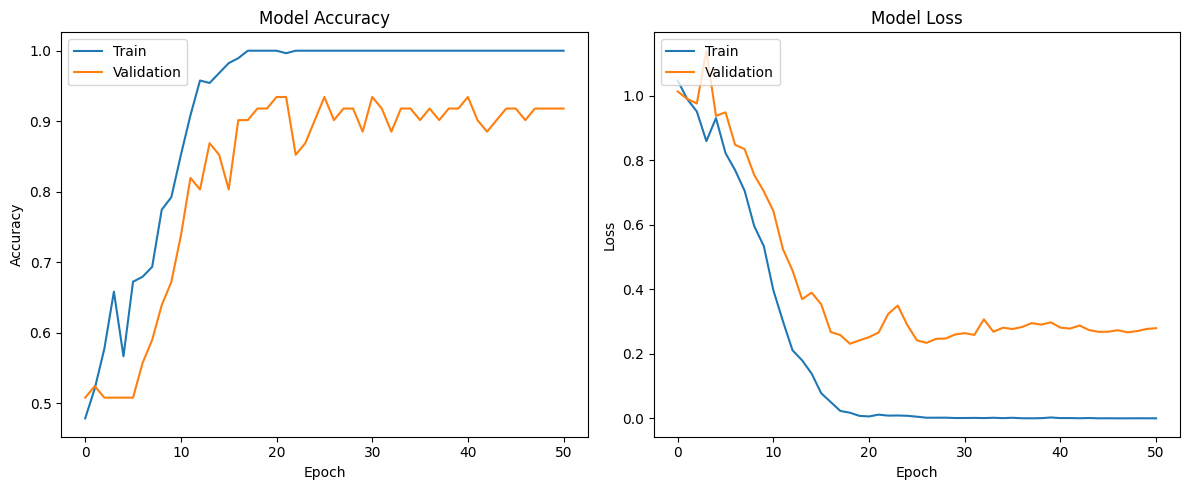

In [123]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.savefig(os.path.join(RESULTS_DIR, 'cnn_training_history.png'))
plt.show()

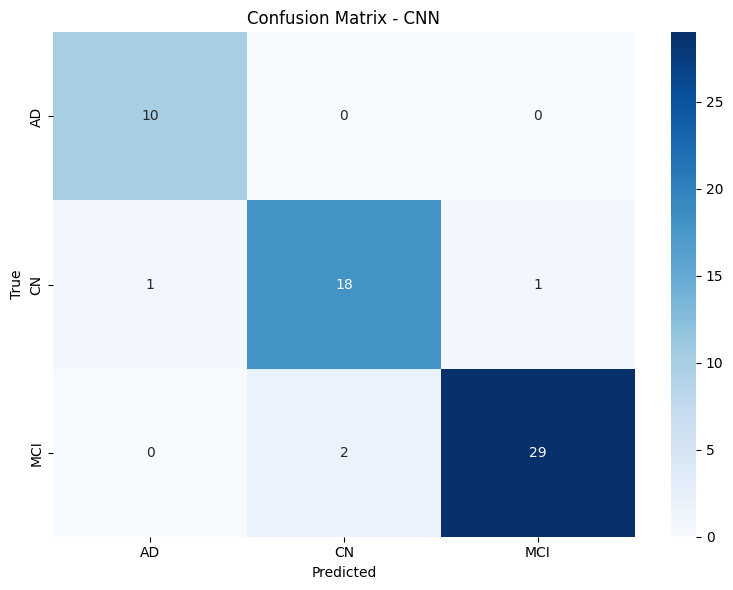

In [124]:
# Create CNN confusion matrix
cm = confusion_matrix(y_val, y_val_pred_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
           xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - CNN')
plt.tight_layout()
plt.savefig(os.path.join(CM_DIR, 'CNN_cm.png'))
plt.show()

# 05: Training Other Models(RandomForest, SVM, KNN, XGB)

In [125]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb

## 5.1 Models

In [126]:
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'XGBoost': xgb.XGBClassifier(n_estimators=100, random_state=42, use_label_encoder=False, eval_metric='mlogloss'),
    'SVM': SVC(probability=True, random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42)
}

results = []
val_predictions = {}

## 5.2 Training and Evaluating the Models

In [127]:
for name, model_instance in models.items():
    print(f"Training {name}......")
    
    try:
        # Train the model
        model_instance.fit(X_train, y_train_numeric)
        
        # Make predictions
        y_val_pred_enc = model_instance.predict(X_val)
        
        # Convert encoded predictions back to original labels
        y_val_pred = label_encoder.inverse_transform(y_val_pred_enc)
        
        val_predictions[name] = y_val_pred
        
        # Compute metrics
        accuracy = accuracy_score(y_val, y_val_pred)
        precision = precision_score(y_val, y_val_pred, average='weighted')
        recall = recall_score(y_val, y_val_pred, average='weighted')
        f1 = f1_score(y_val, y_val_pred, average='weighted')
        
        results.append({
            'Model': name,
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1 Score': f1
        })
        
        # Save model
        model_path = os.path.join(MODELS_DIR, f"{name.replace(' ', '_')}.joblib")
        joblib.dump(model_instance, model_path)
        print(f"  Saved model to {model_path}")
        
    except Exception as e:
        print(f"  Error training {name}: {e}")

# Save Other model metrics to CSV
trad_results_df = pd.DataFrame(results)
metrics_path = os.path.join(RESULTS_DIR, 'traditional_models_metrics.csv')
trad_results_df.to_csv(metrics_path, index=False)
print(f"Saved Other model metrics to {metrics_path}")

Training Random Forest......
  Saved model to /kaggle/working/Models/Random_Forest.joblib
Training XGBoost......
  Saved model to /kaggle/working/Models/XGBoost.joblib
Training SVM......
  Saved model to /kaggle/working/Models/SVM.joblib
Training KNN......
  Saved model to /kaggle/working/Models/KNN.joblib
Training Logistic Regression......
  Saved model to /kaggle/working/Models/Logistic_Regression.joblib
Saved Other model metrics to /kaggle/working/Results/traditional_models_metrics.csv


## 5.3 Confusion Matrices

Creating confusion matrix for Random Forest...


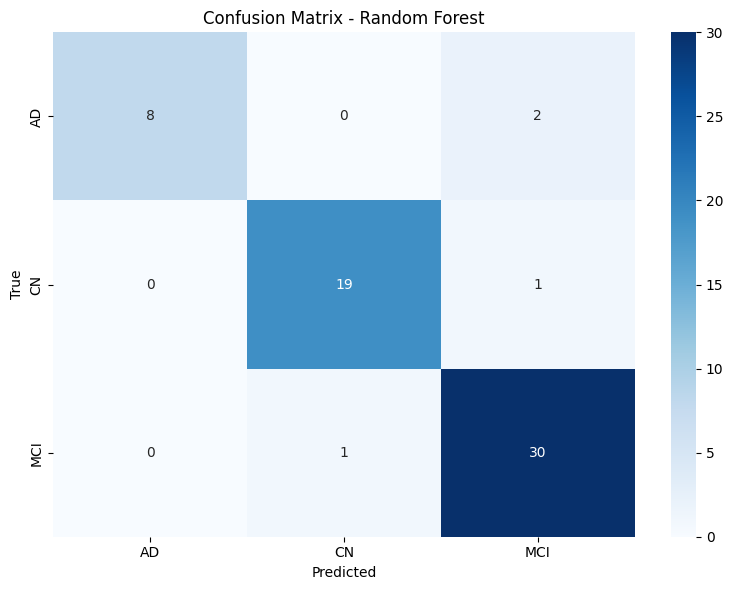

  Saved confusion matrix to /kaggle/working/Results/Confusion_Matrices/Random_Forest_cm.png
Creating confusion matrix for XGBoost...


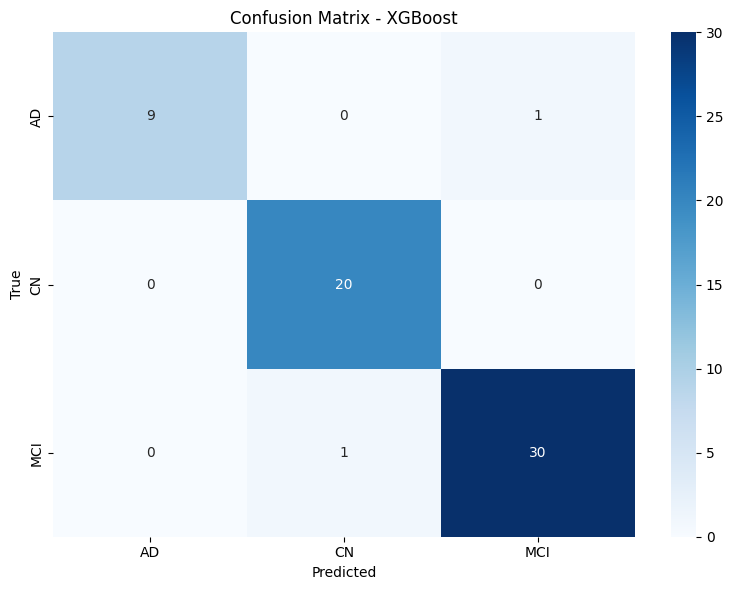

  Saved confusion matrix to /kaggle/working/Results/Confusion_Matrices/XGBoost_cm.png
Creating confusion matrix for SVM...


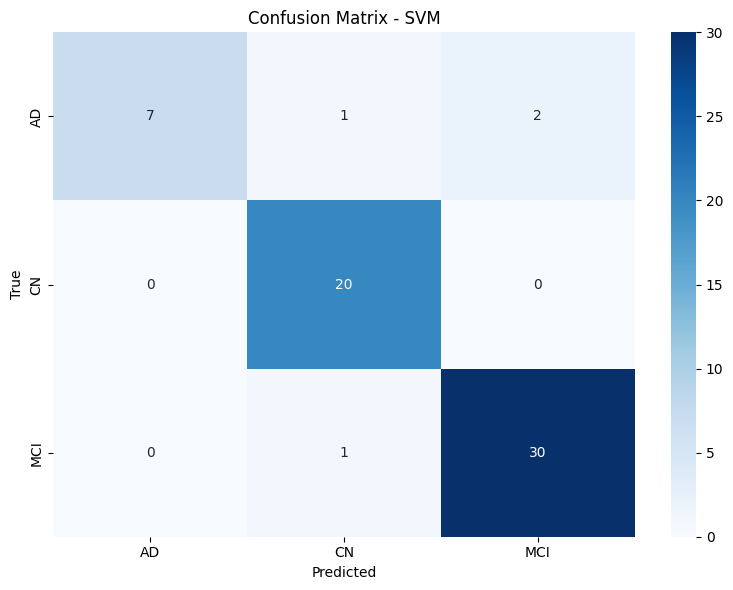

  Saved confusion matrix to /kaggle/working/Results/Confusion_Matrices/SVM_cm.png
Creating confusion matrix for KNN...


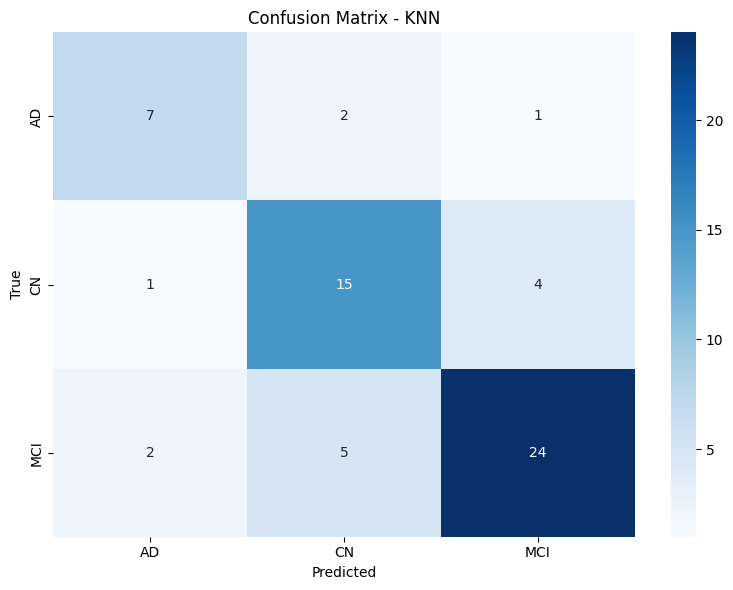

  Saved confusion matrix to /kaggle/working/Results/Confusion_Matrices/KNN_cm.png
Creating confusion matrix for Logistic Regression...


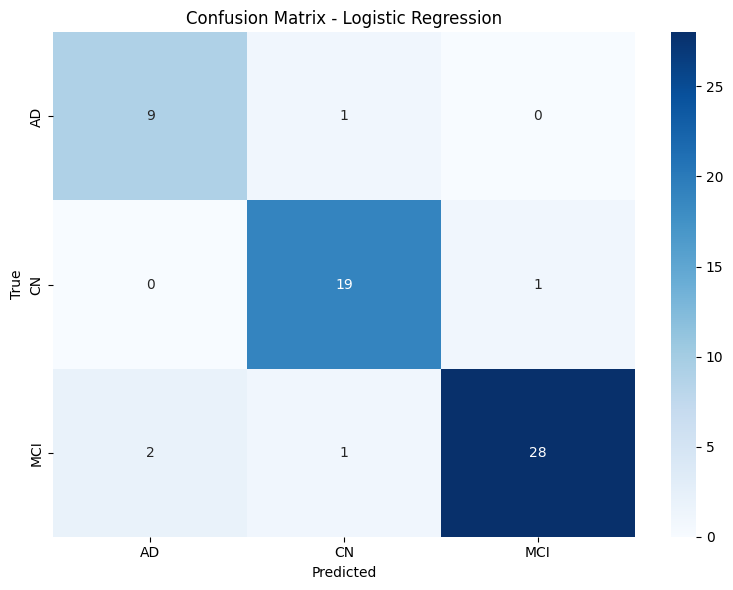

  Saved confusion matrix to /kaggle/working/Results/Confusion_Matrices/Logistic_Regression_cm.png


In [128]:
for name, y_pred in val_predictions.items():
    print(f"Creating confusion matrix for {name}...")
    
    # Create and save confusion matrix
    cm = confusion_matrix(y_val, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
               xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix - {name}')
    plt.tight_layout()
    cm_path = os.path.join(CM_DIR, f"{name.replace(' ', '_')}_cm.png")
    plt.savefig(cm_path)
    plt.show()
    print(f"  Saved confusion matrix to {cm_path}")

## 5.4 Feature Importance

Creating feature importance plot...


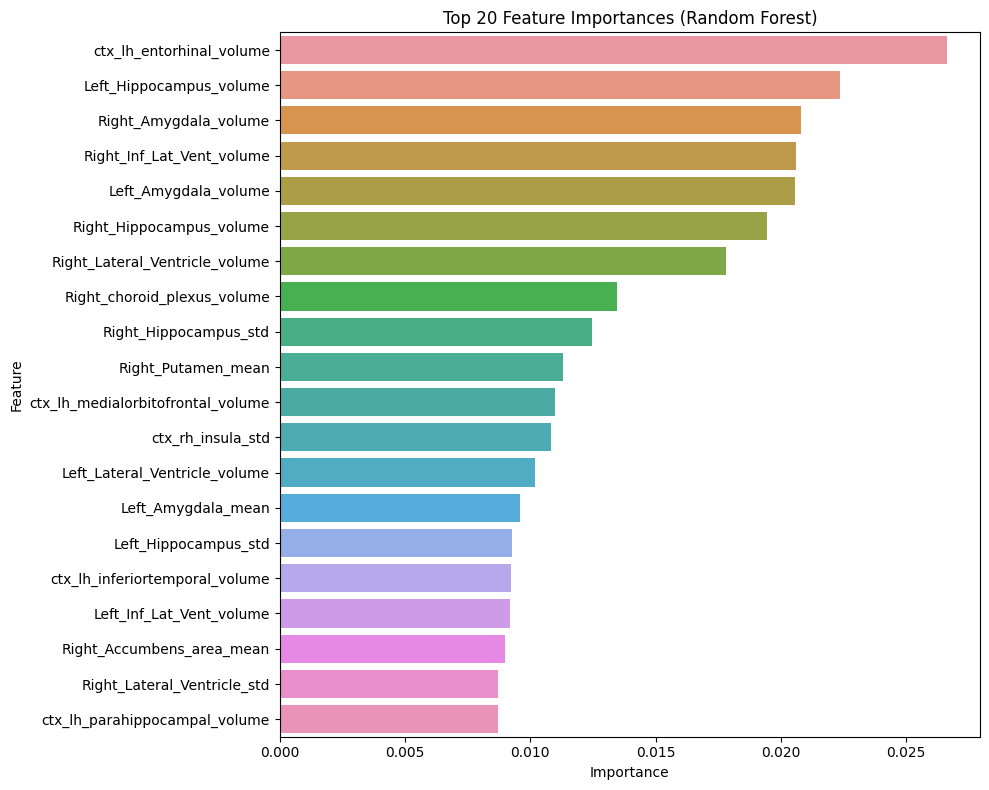

Saved feature importance plot to /kaggle/working/Results/feature_importance.png


In [129]:
if 'Random Forest' in models:
    print("Creating feature importance plot...")
    feature_importance = pd.DataFrame({
        'Feature': feature_names,
        'Importance': models['Random Forest'].feature_importances_
    })
    feature_importance = feature_importance.sort_values('Importance', ascending=False).head(20)
    
    plt.figure(figsize=(10, 8))
    sns.barplot(x='Importance', y='Feature', data=feature_importance)
    plt.title('Top 20 Feature Importances (Random Forest)')
    plt.tight_layout()
    importance_path = os.path.join(RESULTS_DIR, 'feature_importance.png')
    plt.savefig(importance_path)
    plt.show()
    print(f"Saved feature importance plot to {importance_path}")

In [130]:
cnn_results = pd.DataFrame([{
    'Model': 'CNN',
    'Accuracy': cnn_accuracy,
    'Precision': cnn_precision,
    'Recall': cnn_recall,
    'F1 Score': cnn_f1
}])

# Combine all results
all_results_df = pd.concat([trad_results_df, cnn_results], ignore_index=True)
combined_metrics_path = os.path.join(RESULTS_DIR, 'all_models_metrics.csv')
all_results_df.to_csv(combined_metrics_path, index=False)
print(f"Saved combined metrics to {combined_metrics_path}")

Saved combined metrics to /kaggle/working/Results/all_models_metrics.csv


## 5.5 Creating individual metric comparison plots

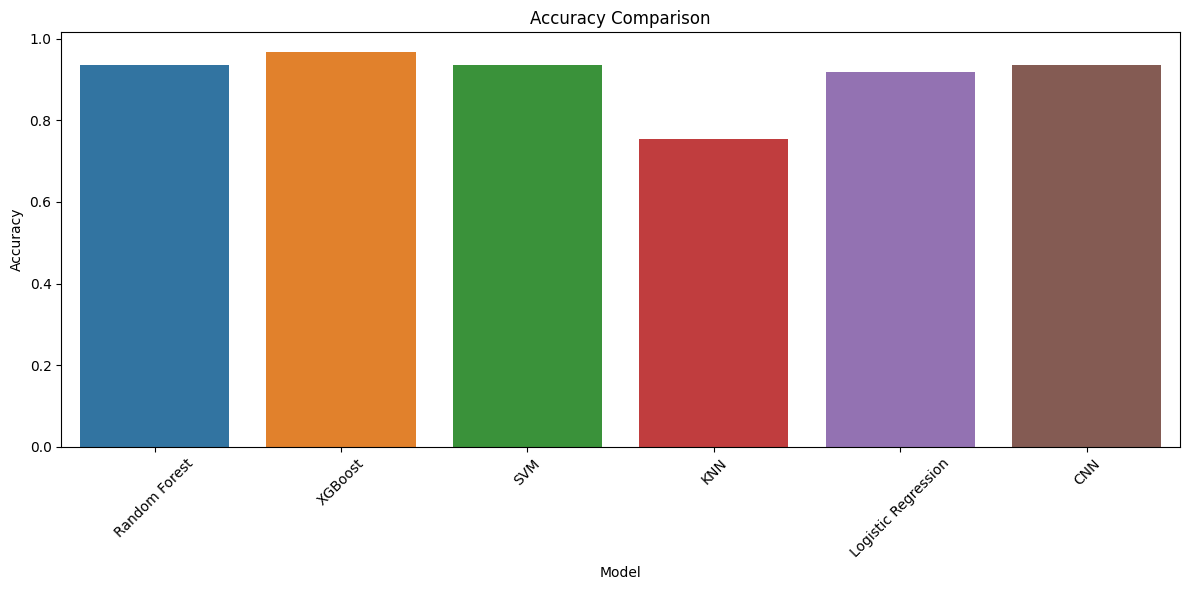

Saved Accuracy comparison plot to /kaggle/working/Results/accuracy_comparison.png


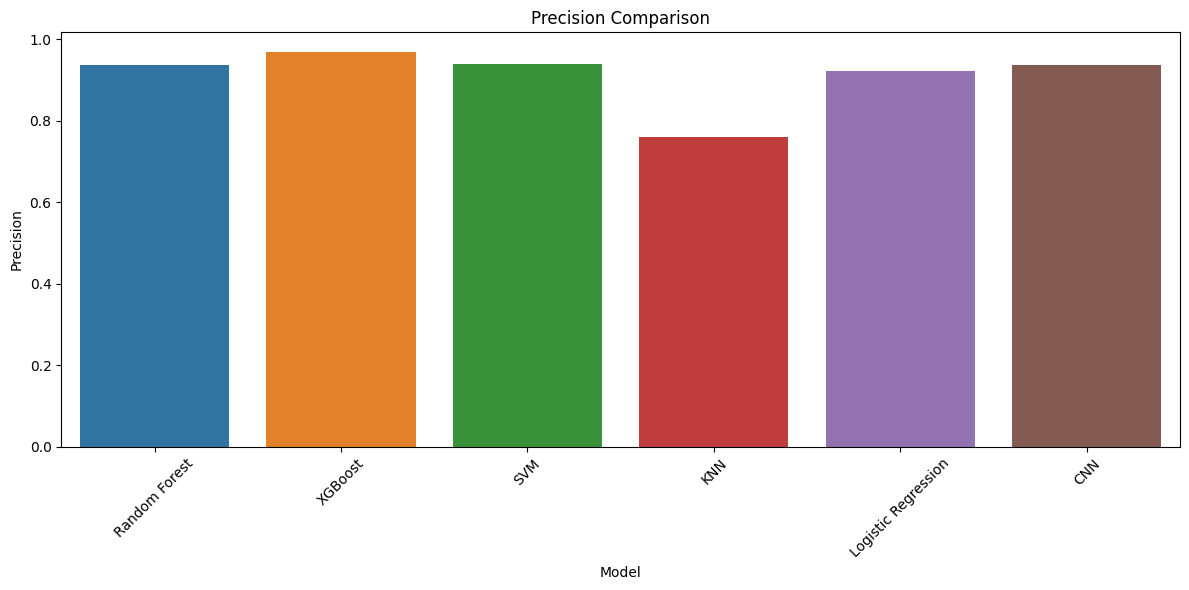

Saved Precision comparison plot to /kaggle/working/Results/precision_comparison.png


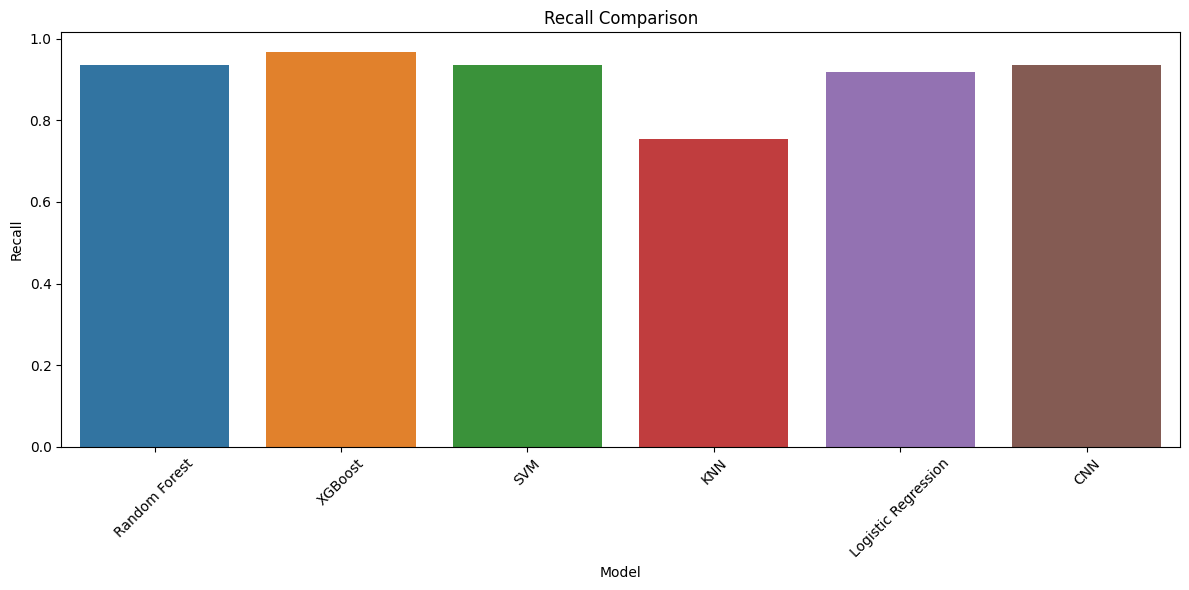

Saved Recall comparison plot to /kaggle/working/Results/recall_comparison.png


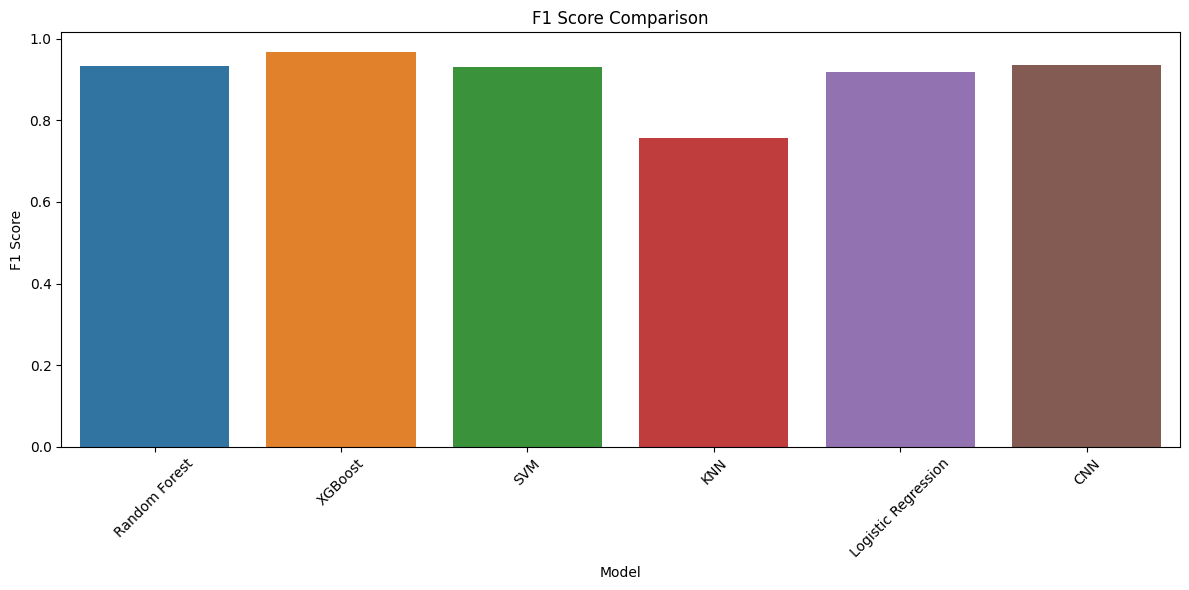

Saved F1 Score comparison plot to /kaggle/working/Results/f1_score_comparison.png


In [131]:
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

for metric in metrics:
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Model', y=metric, data=all_results_df)
    plt.title(f'{metric} Comparison')
    plt.xticks(rotation=45)
    plt.tight_layout()
    metric_path = os.path.join(RESULTS_DIR, f"{metric.lower().replace(' ', '_')}_comparison.png")
    plt.savefig(metric_path)
    plt.show()
    print(f"Saved {metric} comparison plot to {metric_path}")

## 5.6 Creating Combined Metrics Plot

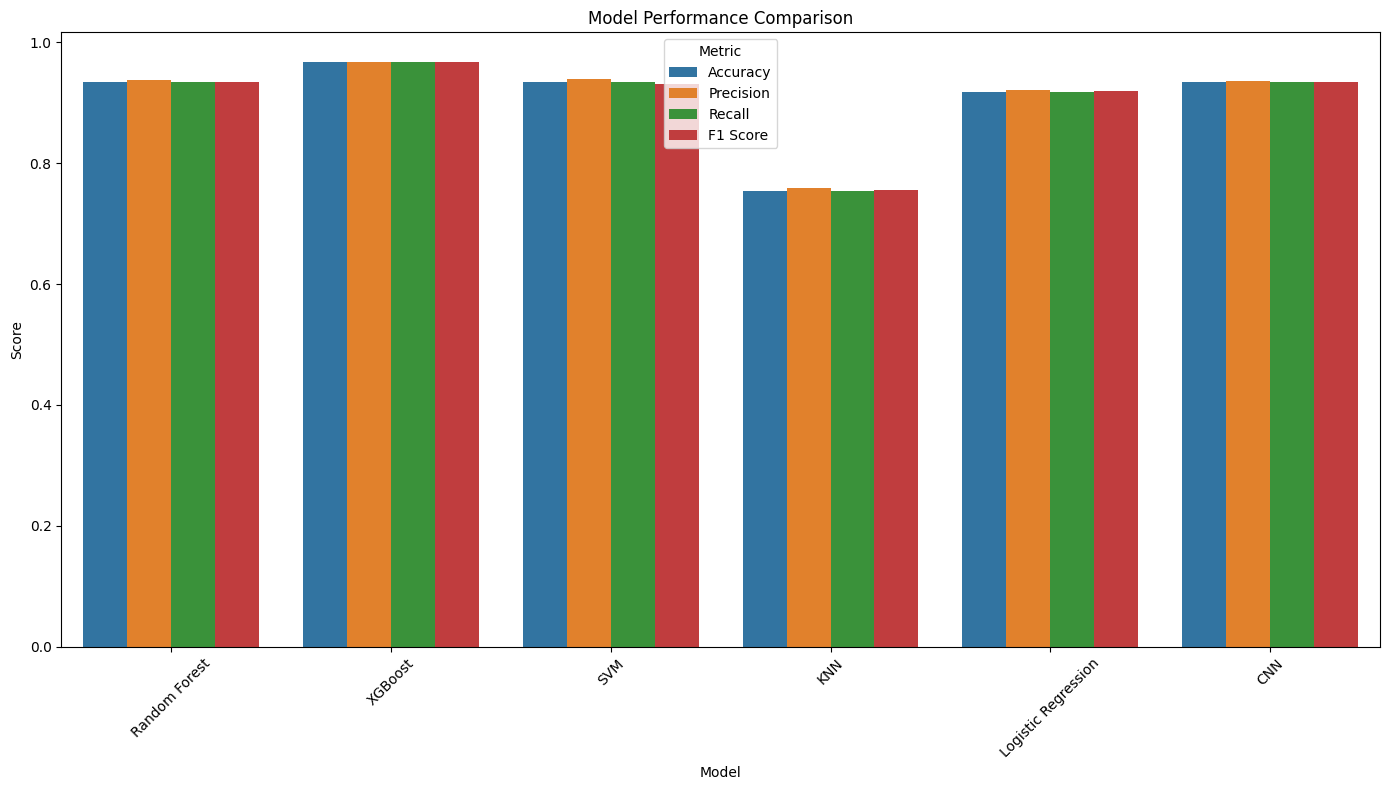

Saved overall performance comparison plot to /kaggle/working/Results/model_performance_comparison.png


In [132]:
plt.figure(figsize=(14, 8))
results_melted = pd.melt(all_results_df, id_vars=['Model'], value_vars=metrics, 
                     var_name='Metric', value_name='Score')
sns.barplot(x='Model', y='Score', hue='Metric', data=results_melted)
plt.title('Model Performance Comparison')
plt.xticks(rotation=45)
plt.tight_layout()
comparison_path = os.path.join(RESULTS_DIR, 'model_performance_comparison.png')
plt.savefig(comparison_path)
plt.show()
print(f"Saved overall performance comparison plot to {comparison_path}")

# 06: Finding Best Model

In [133]:
best_row = all_results_df.loc[all_results_df['F1 Score'].idxmax()]
best_model_name = best_row['Model']
best_f1 = best_row['F1 Score']

print(f"Best model: {best_model_name} with F1 Score: {best_f1:.4f}")

# Evaluate the best model on test set
if best_model_name == 'CNN':
    # Load best CNN model
    best_model = tf.keras.models.load_model(os.path.join(MODELS_DIR, 'best_cnn_model.h5'))
    
    # Make predictions on test set
    y_test_pred_proba = best_model.predict(X_test_reshaped)
    y_test_pred_classes = np.argmax(y_test_pred_proba, axis=1)
    y_test_pred_labels = label_encoder.inverse_transform(y_test_pred_classes)
    
    # Save the model with additional metadata
    model_info = {
        'name': 'CNN',
        'scaler': scaler,
        'label_encoder': label_encoder,
    }
    joblib.dump(model_info, os.path.join(MODELS_DIR, 'best_model_info.joblib'))
    
else:
    # Load Other models
    best_model = joblib.load(os.path.join(MODELS_DIR, f"{best_model_name.replace(' ', '_')}.joblib"))
    
    # Make predictions on test set
    y_test_pred_enc = best_model.predict(X_test)
    y_test_pred_labels = label_encoder.inverse_transform(y_test_pred_enc)
    
    # Save as best model with metadata
    joblib.dump({
        'model': best_model,
        'scaler': scaler,
        'label_encoder': label_encoder,
        'name': best_model_name
    }, os.path.join(MODELS_DIR, 'best_model.joblib'))

Best model: XGBoost with F1 Score: 0.9670


# 07: Evaluating Final Test Metrics

In [134]:
test_accuracy = accuracy_score(y_test, y_test_pred_labels)
test_precision = precision_score(y_test, y_test_pred_labels, average='weighted')
test_recall = recall_score(y_test, y_test_pred_labels, average='weighted')
test_f1 = f1_score(y_test, y_test_pred_labels, average='weighted')

print("\nFinal Test Results:")
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Precision: {test_precision:.4f}")
print(f"Test Recall: {test_recall:.4f}")
print(f"Test F1 Score: {test_f1:.4f}")


Final Test Results:
Test Accuracy: 1.0000
Test Precision: 1.0000
Test Recall: 1.0000
Test F1 Score: 1.0000


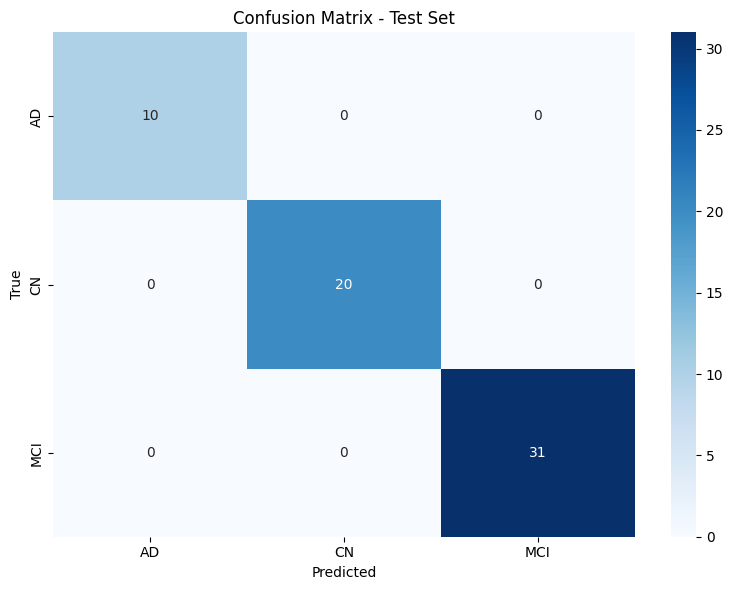


Alzheimer's Disease Detection Pipeline has been completed successfully!
Results saved to /kaggle/working/Results
Models saved to /kaggle/working/Models


In [135]:
test_report = classification_report(y_test, y_test_pred_labels, output_dict=True)
test_metrics_df = pd.DataFrame(test_report).transpose()
test_metrics_df.to_csv(os.path.join(RESULTS_DIR, 'test_metrics.csv'))

cm = confusion_matrix(y_test, y_test_pred_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
           xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Test Set')
plt.tight_layout()
plt.savefig(os.path.join(RESULTS_DIR, 'test_confusion_matrix.png'))
plt.show()

print("\nAlzheimer's Disease Detection Pipeline has been completed successfully!")
print(f"Results saved to {RESULTS_DIR}")
print(f"Models saved to {MODELS_DIR}")